In [1]:
%load_ext autoreload
%autoreload 2

import ncem

datadir = '/Users/anna.schaar/phd/datasets/'

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='pascualreguant',
    data_path=datadir + '/pascualreguant/',
    radius=60,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
  0%|          | 0/1 [00:00<?, ?it/s]/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


collecting image-wise celldata
adding graph-level covariates
Loaded 1 images with complete data from 1 patients over 6991 cells with 51 cell features and 9 distinct celltypes.
Mean of mean node degree per images across images: 19.083107

 Celldata metadata: {'lateral_resolution': 0.325, 'fn': ['TONSIL_MFI_nuclei_data_table.xlsx', 'TONSIL_MFI_membranes_data_table.xlsx'], 'image_col': 'img_keys', 'pos_cols': ['Location_Center_X', 'Location_Center_Y'], 'cluster_col': 'cell_class', 'cluster_col_preprocessed': 'cell_class_preprocessed', 'patient_col': None}


# Supp. Fig. 1: Cell-type centric summary statistics per data set. 

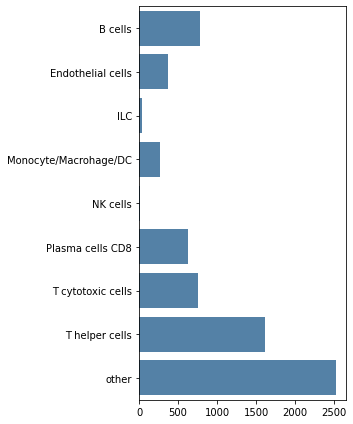

In [3]:
interpreter.data.celltype_frequencies()

0.0
1.1235874696037762
5.451437562580461
20.08310685166643
77.70404806179373
321.3106851666428
1165.782720640824
6991.0


/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/ncem/data.py:192: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=10)


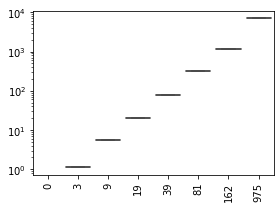

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 12, 30, 60, 120, 250, 500, 3000],
    lateral_resolution=0.325,
)

# Supp. Fig. 2: Variance decomposition in spatial omics data sets.

100%|██████████| 1/1 [00:04<00:00,  4.10s/it]


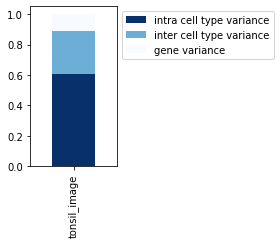

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='other')
interpreter.data.variance_decomposition(
    var_decomp, 
    figsize=(4,3.5),
)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.603555
inter cell type variance    0.287348
gene variance               0.109097
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

In [5]:
interpreter.data.celldata_interaction_matrix(
    figsize=(3,3),
    #fontsize=10
)

  0%|          | 0/1 [00:00<?, ?it/s]


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUse of unsupported NumPy function 'numpy.split' or unsupported use of the function.
[1m
File "../../../../../opt/miniconda3/lib/python3.8/site-packages/squidpy/gr/_nhood.py", line 352:[0m
[1mdef _interaction_matrix(
    <source elided>
) -> np.ndarray:
[1m    indices_list = np.split(indices, indptr[1:-1])
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: typing of get attribute at /Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/squidpy/gr/_nhood.py (352)[0m
[1m
File "../../../../../opt/miniconda3/lib/python3.8/site-packages/squidpy/gr/_nhood.py", line 352:[0m
[1mdef _interaction_matrix(
    <source elided>
) -> np.ndarray:
[1m    indices_list = np.split(indices, indptr[1:-1])
[0m    [1m^[0m[0m


# Supp. Fig. 7: Ligand–receptor permutation test. 

/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


n cells: 4470


/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

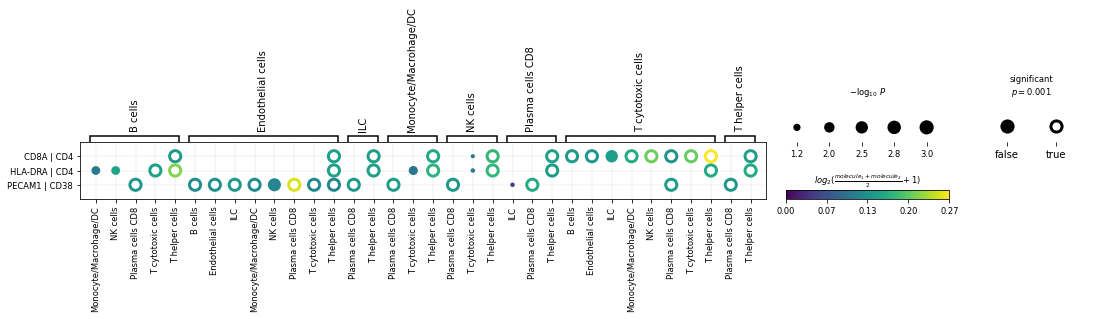

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
hgnc_names = [
    'BCL6', 
    'FOXP3', 
    'IKZF2', 
    'IRF4', 
    'MKI67', 
    'PAX5', 
    'CCR6', 
    'ITGAE',
    'ITGAX', 
    'IL3RA', 
    'IL7R', 
    'SDC1', 
    'CD14', 
    'THBD', 
    'FCGR3A', 
    'KLRB1',
    'CD19', 
    'MS4A1', 
    'CR2', 
    'FCER2', 
    'CD247', 
    'PECAM1', 
    'CD34', 
    'CD38', 
    'CD4',
    'PTPRC', 
    'PTPRC', 
    'PTPRC', 
    'ITGA1', 
    'NCAM1', 
    'CD69', 
    'CD7', 
    'CD8A',
    'KLRD1', 
    'CXCR3', 
    'FCER1A', 
    'GZMA', 
    'HLA-DRA', 
    'ICOS', 
    'CD79A', 
    'IGHG1',
    'IGHM', 
    'CD207', 
    'NCR2', 
    'TNFSF11', 
    'SMN1', 
    'TCRVa72', ## 
    'TRG', 
    'VCAM1',
    'VIM', 
    'KIT'
]
adata = interpreter.data.ligrec(
    hgnc_names=hgnc_names,
    undefined_type='other',
)

In [8]:
import omnipath
omnipath.__version__

'1.0.4'

In [9]:
import requests
requests.__version__

'2.25.1'

In [11]:
import squidpy
squidpy.__version__

'1.1.0'

In [12]:
import urllib3
urllib3.__version__

'1.26.4'

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

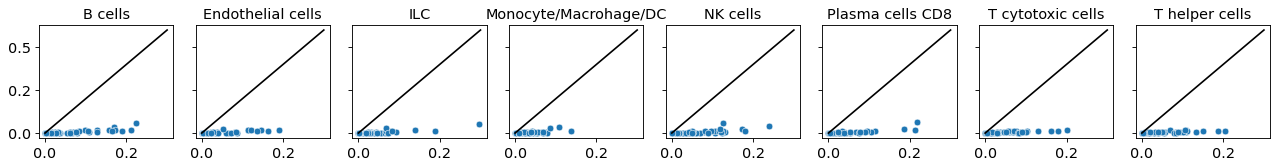

(None,)

In [9]:
interpreter.data.noise_structure(
    undefined_type='other',
    min_x=0.0, max_x=0.3,
),